# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Create lists to hold response info
city_name = []
country_code = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(city_weather['name'])
        country_code.append(city_weather['sys']['country'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        humidity.append(city_weather['main']['humidity'])
        cloudiness.append(city_weather['clouds']['all'])
        wind_speed.append(city_weather['wind']['speed'])
        date.append(city_weather['dt'])

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Print to logger
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | taoudenni
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | chicoana
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | fallon
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | aoulef
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | tazovsky
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | kolonia town
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 22 of Set 1 | malango
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": city_name,
    "Country": country_code,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date})

# Show Record Count
print(f"Number of records: {len(city_data_df)}")



Number of records: 583


In [5]:
# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Lebu,CL,-37.6167,-73.6500,10.09,67,100,6.42,1722099511
1,Taoudenni,ML,22.6783,-3.9836,45.73,7,3,2.13,1722099696
2,Albany,US,42.6001,-73.9662,28.30,51,0,0.45,1722099696
3,Port-aux-Français,TF,-49.3500,70.2167,0.68,67,99,14.93,1722099696
4,Chicoana,AR,-25.1009,-65.5331,22.25,43,0,2.61,1722099696


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
0,Lebu,CL,-37.6167,-73.6500,10.09,67,100,6.42,1722099511
1,Taoudenni,ML,22.6783,-3.9836,45.73,7,3,2.13,1722099696
2,Albany,US,42.6001,-73.9662,28.30,51,0,0.45,1722099696
3,Port-aux-Français,TF,-49.3500,70.2167,0.68,67,99,14.93,1722099696
4,Chicoana,AR,-25.1009,-65.5331,22.25,43,0,2.61,1722099696


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

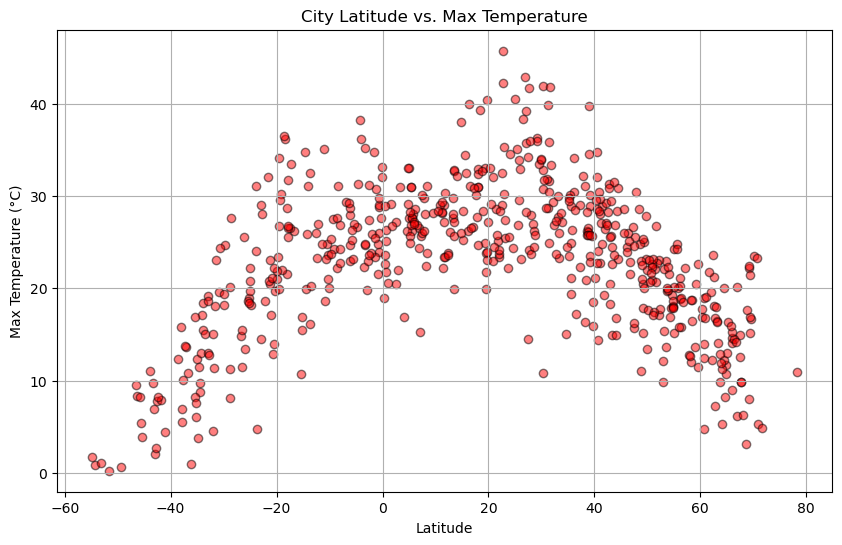

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="red", alpha=0.5, edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

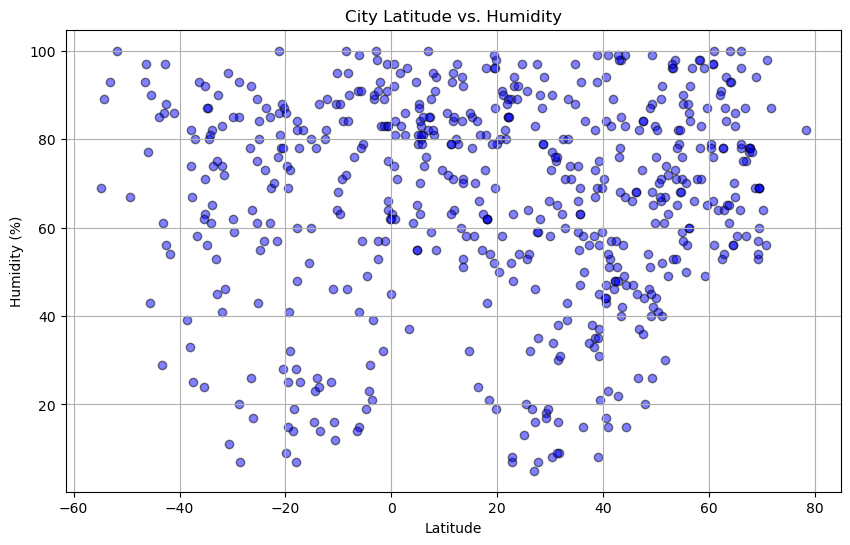

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="blue", alpha=0.5, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

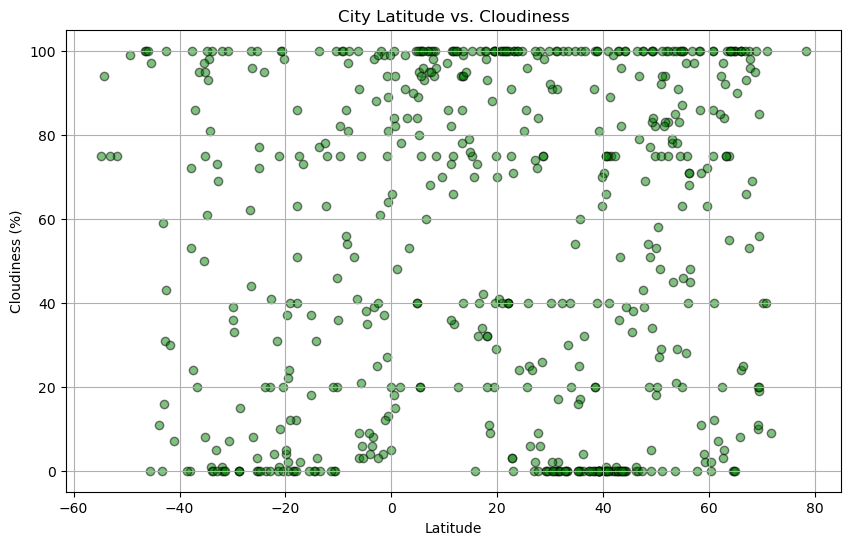

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="green", alpha=0.5, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

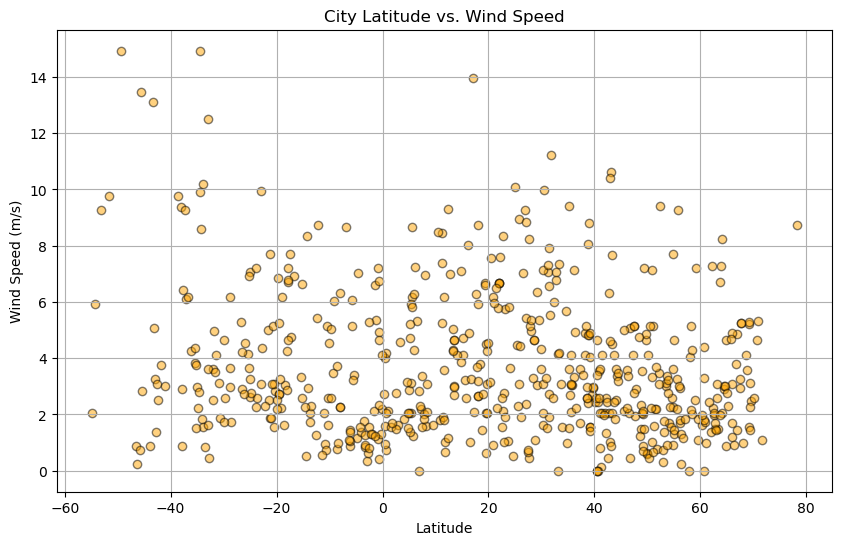

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="orange", alpha=0.5, edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, hemisphere):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, c="blue", alpha=0.5, edgecolor="black")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=12, color="red")
    plt.title(f"{title} - {hemisphere}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()
    
    print(f"{hemisphere} - Linear Regression:")
    print(f"The r-value is: {r_value:.2f}")
    print(f"The r-squared value is: {r_value**2:.2f}")
    print(f"The p-value is: {p_value:.2f}")
    print("-----------------------------")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
1,Taoudenni,ML,22.6783,-3.9836,45.73,7,3,2.13,1722099696
2,Albany,US,42.6001,-73.9662,28.30,51,0,0.45,1722099696
6,Isafjordur,IS,66.0755,-23.1240,9.02,100,100,3.09,1722099696
7,Fallon,US,39.4735,-118.7774,25.62,21,0,2.68,1722099697
9,Aoulef,DZ,26.9667,1.0833,42.88,5,0,9.26,1722099697


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
0,Lebu,CL,-37.6167,-73.6500,10.09,67,100,6.42,1722099511
3,Port-aux-Français,TF,-49.3500,70.2167,0.68,67,99,14.93,1722099696
4,Chicoana,AR,-25.1009,-65.5331,22.25,43,0,2.61,1722099696
5,Adamstown,PN,-25.0660,-130.1015,20.84,80,77,7.08,1722099696
8,Margaret River,AU,-33.9500,115.0667,15.50,82,100,10.18,1722099697


###  Temperature vs. Latitude Linear Regression Plot

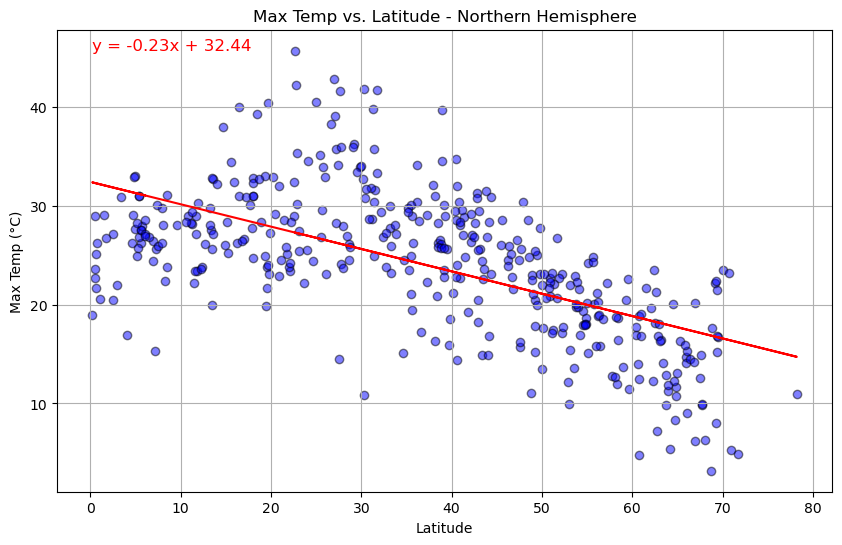

Northern Hemisphere - Linear Regression:
The r-value is: -0.61
The r-squared value is: 0.37
The p-value is: 0.00
-----------------------------


In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Max Temp vs. Latitude", "Latitude", "Max Temp (°C)", "Northern Hemisphere")


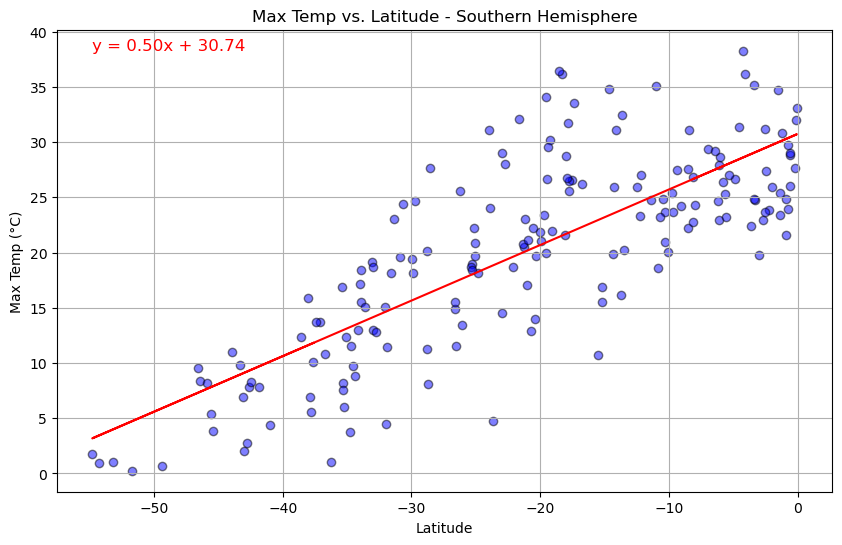

Southern Hemisphere - Linear Regression:
The r-value is: 0.79
The r-squared value is: 0.63
The p-value is: 0.00
-----------------------------


In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Max Temp vs. Latitude", "Latitude", "Max Temp (°C)", "Southern Hemisphere")


**Discussion about the linear relationship:** As max temp. increases, latitude decreases, this shows that they have an inverely proportional relationship. 

### Humidity vs. Latitude Linear Regression Plot

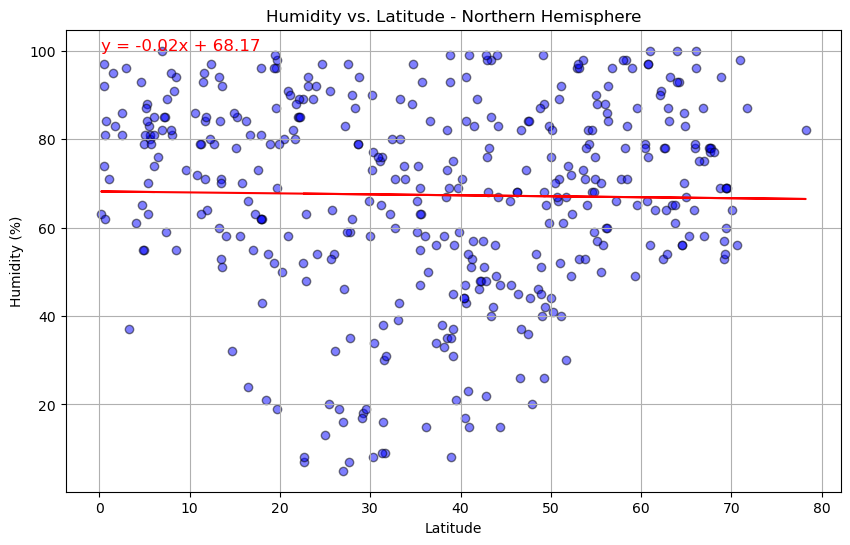

Northern Hemisphere - Linear Regression:
The r-value is: -0.02
The r-squared value is: 0.00
The p-value is: 0.70
-----------------------------


In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Northern Hemisphere")


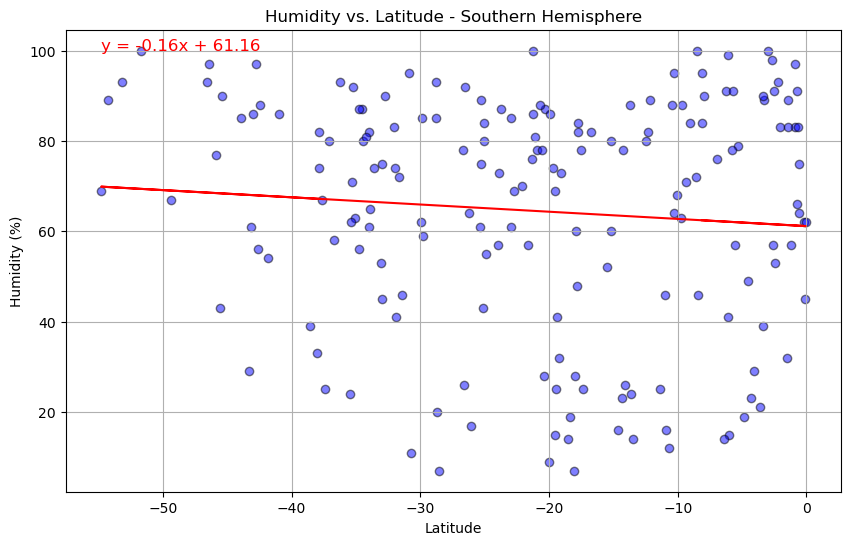

Southern Hemisphere - Linear Regression:
The r-value is: -0.09
The r-squared value is: 0.01
The p-value is: 0.25
-----------------------------


In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Southern Hemisphere")


**Discussion about the linear relationship:** Humidity % and latitude have a directly proportional relationship. They both decrease together. However the data has too many outliers for it to be a true and accurate relationship

### Cloudiness vs. Latitude Linear Regression Plot

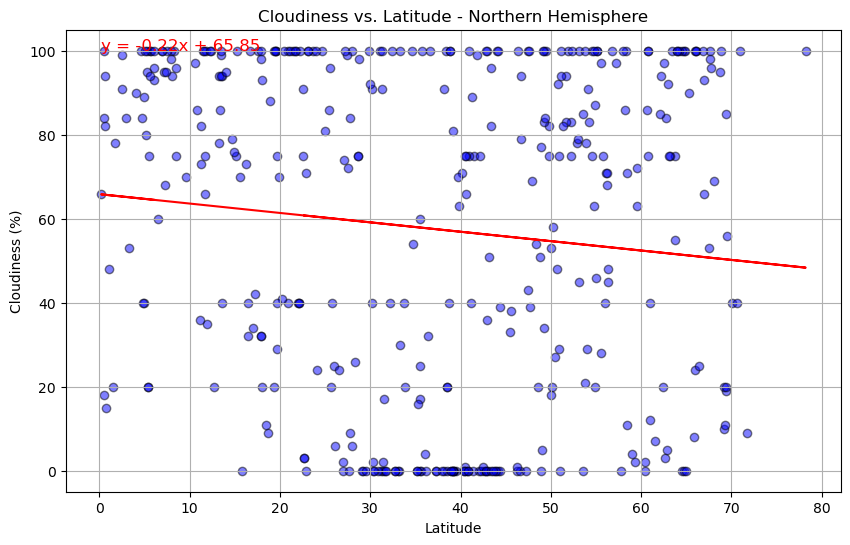

Northern Hemisphere - Linear Regression:
The r-value is: -0.11
The r-squared value is: 0.01
The p-value is: 0.02
-----------------------------


In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Northern Hemisphere")


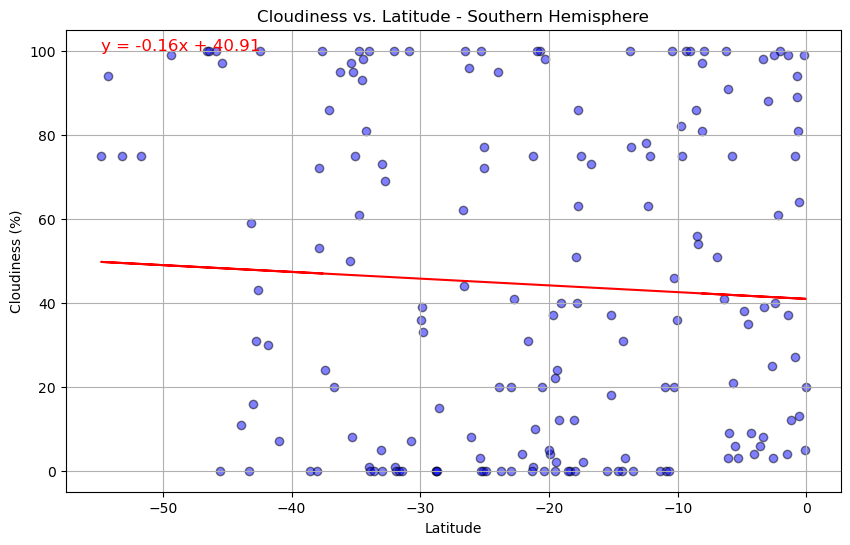

Southern Hemisphere - Linear Regression:
The r-value is: -0.06
The r-squared value is: 0.00
The p-value is: 0.43
-----------------------------


In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Southern Hemisphere")


**Discussion about the linear relationship:** Cloud % and latitude have a directly decreasing proportional relationship, however there are many points above and below the line. There are too many outliers 

### Wind Speed vs. Latitude Linear Regression Plot

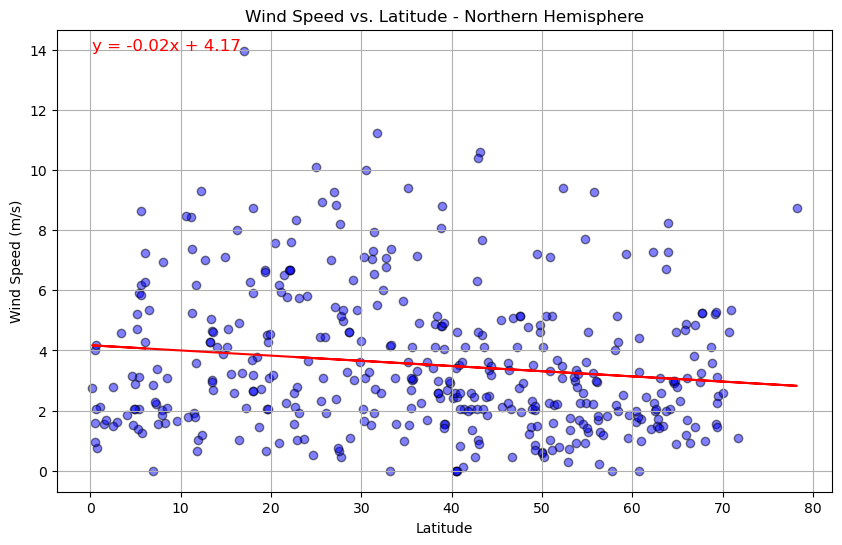

Northern Hemisphere - Linear Regression:
The r-value is: -0.14
The r-squared value is: 0.02
The p-value is: 0.00
-----------------------------


In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "Northern Hemisphere")


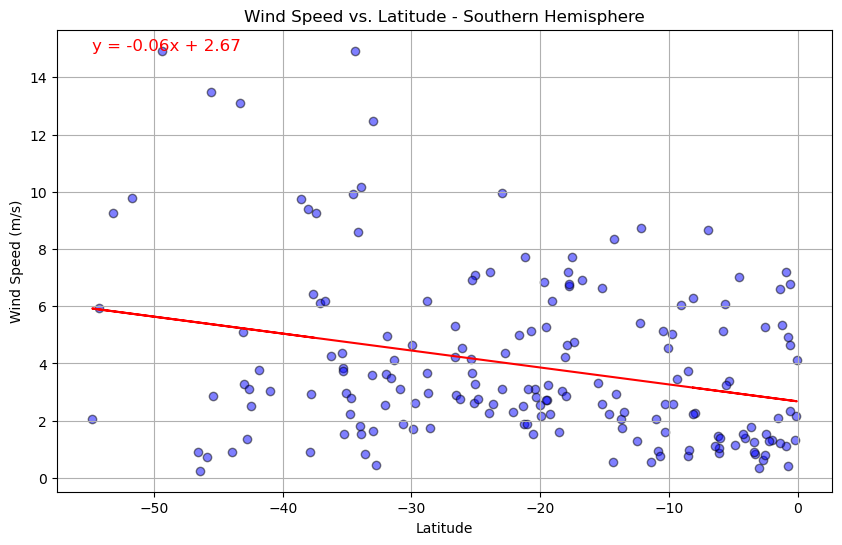

Southern Hemisphere - Linear Regression:
The r-value is: -0.28
The r-squared value is: 0.08
The p-value is: 0.00
-----------------------------


In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "Southern Hemisphere")


**Discussion about the linear relationship:** on average wind speed stays under 4m/s however, as latitude decreases wind speed decreases. They have a directly proportional relationship.  